In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[SnP500 Close](https://lazyprogrammer.me/course_files/sp500_close.csv)

In [2]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [3]:
goog = close[['GOOG']].copy().dropna()

In [4]:
goog

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00
...,...
2018-02-01,1167.70
2018-02-02,1111.90
2018-02-05,1055.80
2018-02-06,1080.60


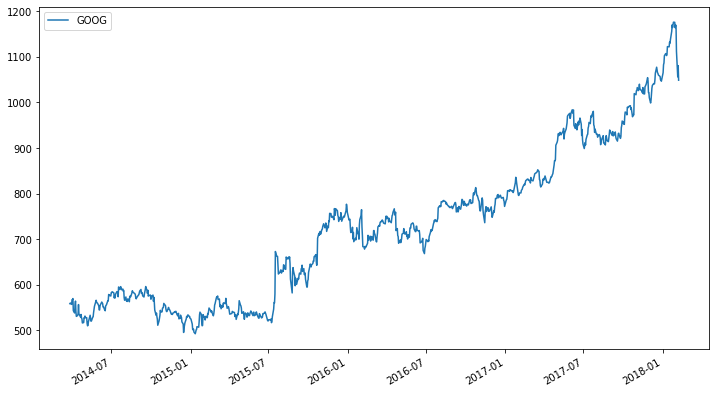

In [5]:
goog.plot(figsize=(12, 7));

Log Return в одну строку

In [6]:
goog['return'] = np.log(goog['GOOG'].pct_change(1) + 1)

Log Return через получения лог цены и разницы между ними

In [7]:
goog['log_price'] = np.log(goog['GOOG'])
goog['return_2'] = goog['log_price'] - goog['log_price'].shift(1)

In [8]:
goog

,GOOG,return,log_price,return_2
2014-03-27,558.46,NaN,6.325183,NaN
2014-03-28,559.99,0.002736,6.327919,0.002736
2014-03-31,556.97,-0.005408,6.322511,-0.005408
2014-04-01,567.16,0.018130,6.340641,0.018130
2014-04-02,567.00,-0.000282,6.340359,-0.000282
...,...,...,...,...
2018-02-01,1167.70,-0.001916,7.062791,-0.001916
2018-02-02,1111.90,-0.048966,7.013826,-0.048966
2018-02-05,1055.80,-0.051771,6.962054,-0.051771
2018-02-06,1080.60,0.023218,6.985272,0.023218


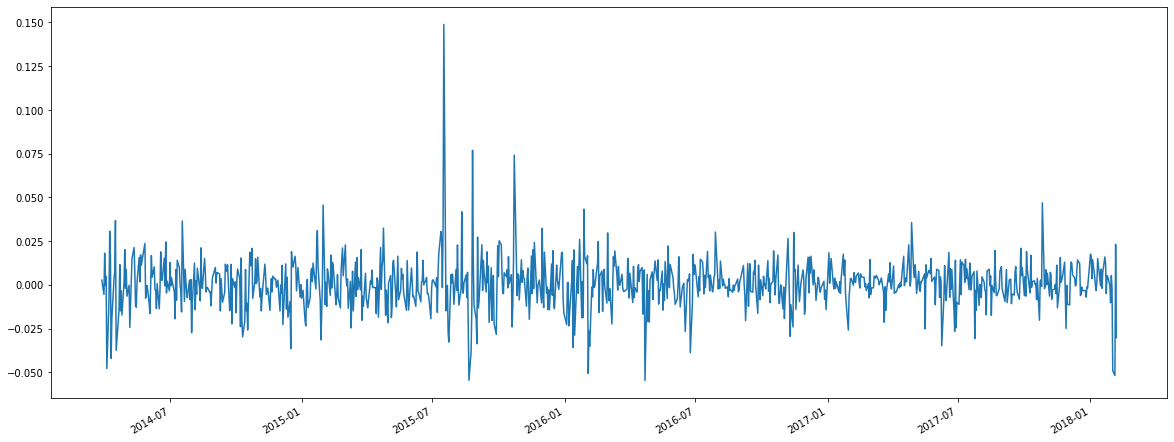

In [9]:
goog['return'].plot(figsize=(20, 8));

Calculate SMA

In [10]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(15)

,GOOG,return,log_price,return_2,SMA-10
2014-03-27,558.46,NaN,6.325183,NaN,NaN
2014-03-28,559.99,0.002736,6.327919,0.002736,NaN
2014-03-31,556.97,-0.005408,6.322511,-0.005408,NaN
2014-04-01,567.16,0.018130,6.340641,0.018130,NaN
2014-04-02,567.00,-0.000282,6.340359,-0.000282,NaN
2014-04-03,569.74,0.004821,6.345180,0.004821,NaN
2014-04-04,543.14,-0.047813,6.297367,-0.047813,NaN
2014-04-07,538.15,-0.009230,6.288137,-0.009230,NaN
2014-04-08,554.90,0.030651,6.318788,0.030651,NaN
2014-04-09,564.14,0.016515,6.335302,0.016515,557.965


In [11]:
# тип объекта
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

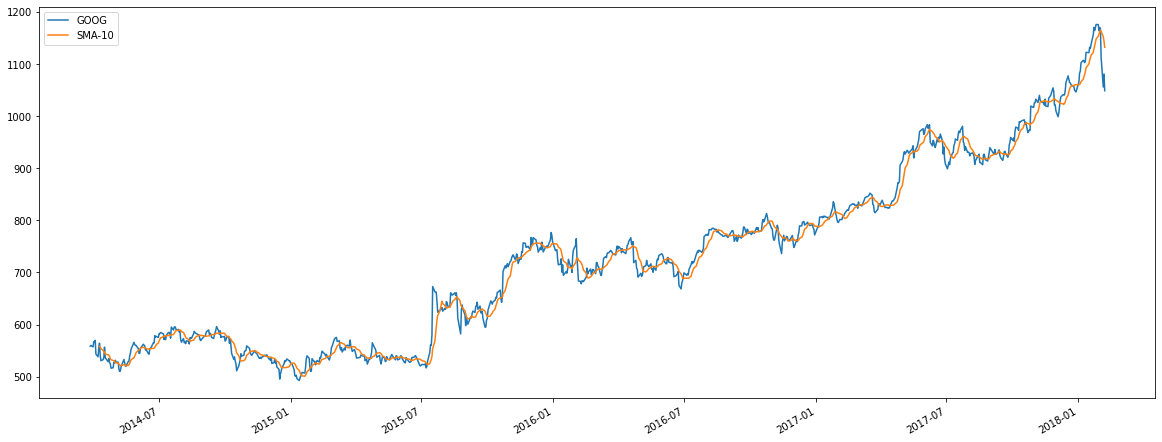

In [12]:
goog[['GOOG', 'SMA-10']].plot(figsize=(20, 8));

In [13]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()

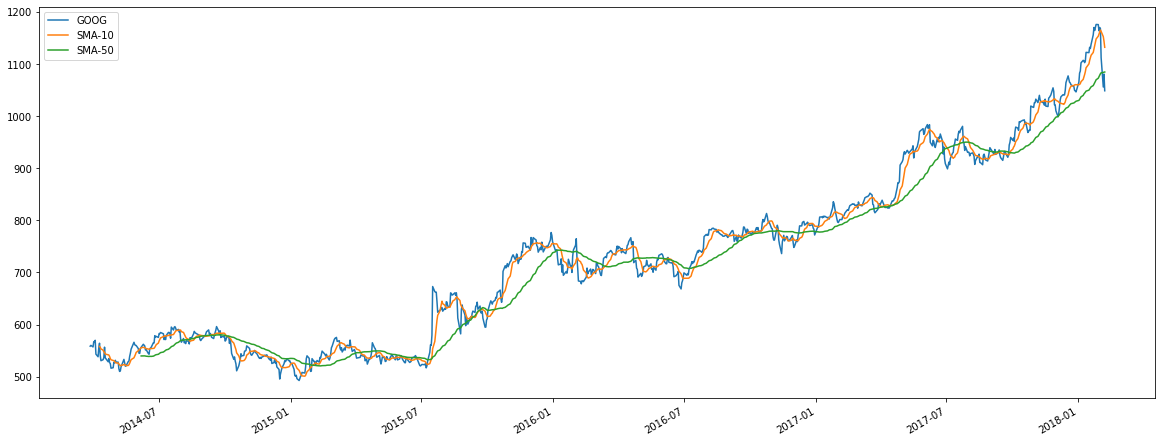

In [14]:
goog[['GOOG', 'SMA-10', 'SMA-50']].plot(figsize=(20, 8));

### Multi-dimension TimeSeries

In [17]:
two_stocks = close[['AAPL', 'GOOG']].copy().dropna()

In [18]:
two_stocks

,AAPL,GOOG
2014-03-27,76.7799,558.46
2014-03-28,76.6942,559.99
2014-03-31,76.6771,556.97
2014-04-01,77.3785,567.16
2014-04-02,77.5071,567.00
...,...,...
2018-02-01,167.7800,1167.70
2018-02-02,160.5000,1111.90
2018-02-05,156.4900,1055.80
2018-02-06,163.0300,1080.60


In [19]:
cov = two_stocks.rolling(50).cov()
cov

AAPL         GOOG
2014-03-27 AAPL        NaN          NaN
           GOOG        NaN          NaN
2014-03-28 AAPL        NaN          NaN
           GOOG        NaN          NaN
2014-03-31 AAPL        NaN          NaN
...                    ...          ...
2018-02-05 GOOG  34.825709  2738.554490
2018-02-06 AAPL  19.121371    38.174468
           GOOG  38.174468  2691.756465
2018-02-07 AAPL  22.052882    49.980378
           GOOG  49.980378  2678.778214

[1950 rows x 2 columns]

In [20]:
cov.loc['2018-02-06']

,AAPL,GOOG
AAPL,19.121371,38.174468
GOOG,38.174468,2691.756465


In [21]:
# Логарифмические приросты считаю
two_stocks['AAPL_Return'] = np.log(two_stocks['AAPL'].pct_change(1) + 1)
two_stocks['GOOG_Return'] = np.log(two_stocks['GOOG'].pct_change(1) + 1)

In [22]:
# SMA для приростов
two_stocks['AAPL_SMA-50'] = two_stocks['AAPL_Return'].rolling(50).mean()
two_stocks['GOOG_SMA-50'] = two_stocks['GOOG_Return'].rolling(50).mean()

In [23]:
two_stocks

,AAPL,GOOG,AAPL_Return,GOOG_Return,AAPL_SMA-50,GOOG_SMA-50
2014-03-27,76.7799,558.46,NaN,NaN,NaN,NaN
2014-03-28,76.6942,559.99,-0.001117,0.002736,NaN,NaN
2014-03-31,76.6771,556.97,-0.000223,-0.005408,NaN,NaN
2014-04-01,77.3785,567.16,0.009106,0.018130,NaN,NaN
2014-04-02,77.5071,567.00,0.001661,-0.000282,NaN,NaN
...,...,...,...,...,...,...
2018-02-01,167.7800,1167.70,0.002088,-0.001916,-0.000281,0.002723
2018-02-02,160.5000,1111.90,-0.044360,-0.048966,-0.001148,0.001757
2018-02-05,156.4900,1055.80,-0.025302,-0.051771,-0.002022,0.000408
2018-02-06,163.0300,1080.60,0.040942,0.023218,-0.001412,0.000844


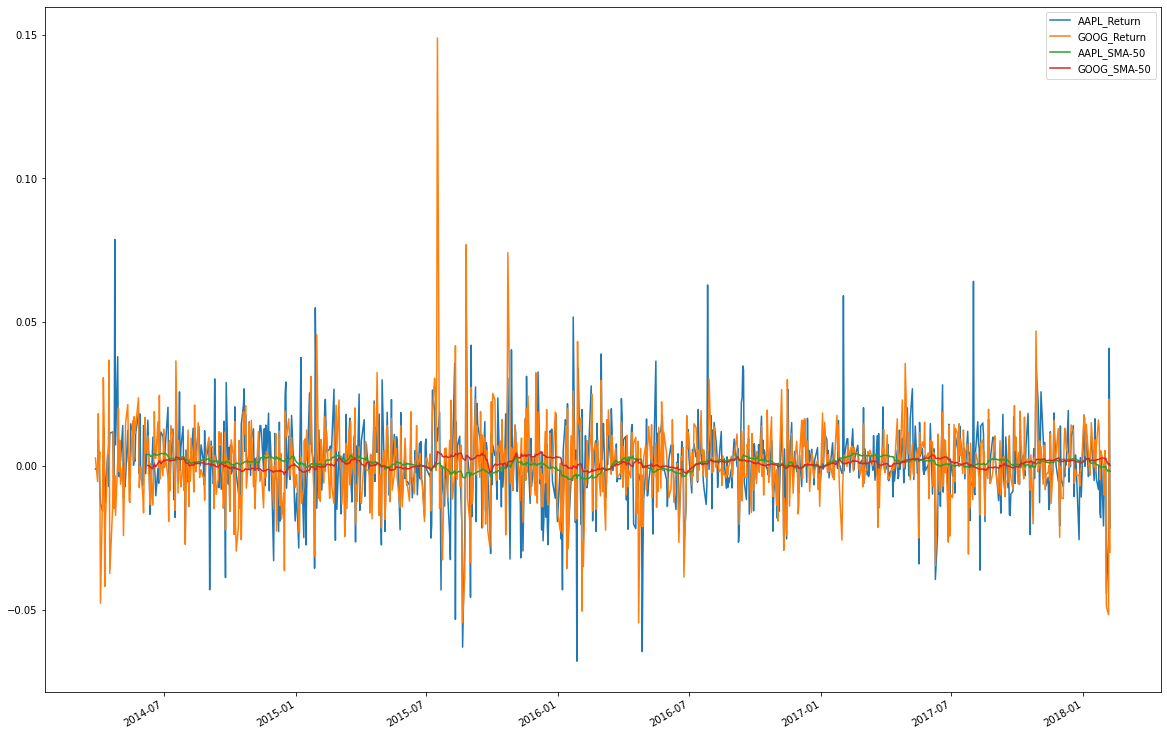

In [26]:
two_stocks[['AAPL_Return', 'GOOG_Return', 'AAPL_SMA-50', 'GOOG_SMA-50']].plot(figsize=(20, 14));

In [29]:
cov = two_stocks[['AAPL_Return', 'GOOG_Return']].rolling(50).cov()
cov.tail()

AAPL_Return  GOOG_Return
2018-02-05 GOOG_Return     0.000110     0.000183
2018-02-06 AAPL_Return     0.000177     0.000129
           GOOG_Return     0.000129     0.000193
2018-02-07 AAPL_Return     0.000185     0.000142
           GOOG_Return     0.000142     0.000212

In [ ]:
cov = two_stocks[['AAPL_Return', 'GOOG_Return']].rolling(50).cov()
cov.tail()

In [31]:
corr = two_stocks[['AAPL_Return', 'GOOG_Return']].rolling(50).corr()
corr

AAPL_Return  GOOG_Return
2014-03-27 AAPL_Return          NaN          NaN
           GOOG_Return          NaN          NaN
2014-03-28 AAPL_Return          NaN          NaN
           GOOG_Return          NaN          NaN
2014-03-31 AAPL_Return          NaN          NaN
...                             ...          ...
2018-02-05 GOOG_Return     0.681098     1.000000
2018-02-06 AAPL_Return     1.000000     0.700564
           GOOG_Return     0.700564     1.000000
2018-02-07 AAPL_Return     1.000000     0.716376
           GOOG_Return     0.716376     1.000000

[1950 rows x 2 columns]